# Generate FWE Corrected R-Squared Map 
- Using maximum statistic correction
- Notes on controlling a regression:
    - Adding covariates to a regression will 'control' for them, but will almost always increase the R-squared. 
    - To 'remove' a covariate from the regression, you will want to regress a nuisance covariate OUT of the covariate of interest. 
        - This means your regressor will become the residuals from the regression of cov_1 ~ nuisance_cov1

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- This is expected to ultimately have the form:

|        | Subject 1 | Subject 2 | Subject 3 | Subject 4 | Subject 5 | Subject 6 | Subject 7 | Subject 8 | Subject 9 | Subject 10 | ... | Subject 40 | Subject 41 | Subject 42 | Subject 43 | Subject 45 | Subject 46 | Subject 47 | Subject 48 | Subject 49 | Subject 50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [1]:
import_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/SeedsYeo'
file_target = '*'
file_column = None

In [2]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=file_column, file_pattern=file_target)
nimg_df = giinii.run()
nimg_df

/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Attempting to import from: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/SeedsYeo/*


,Jin2016Hippocampus_combined_func_seed_AvgR_Fz.nii,Velasco1987Cm_combined_func_seed_AvgR_Fz.nii,Hodaie2002Ant_combined_func_seed_AvgR_Fz.nii,Curkiet2020Hippocampus_combined_func_seed_AvgR_Fz.nii,Herrman2018Ant_combined_func_seed_AvgR_Fz.nii,Yan2023Pulvinar_combined_func_seed_AvgR_Fz.nii,VilelaFilho2023LGN_R_func_seed_AvgR_Fz.nii,Krishna2016Ant_combined_func_seed_AvgR_Fz.nii,Cukiert2009Cm_combined_func_seed_AvgR_Fz.nii,Velasco2007Hippocampus_combined_func_seed_AvgR_Fz.nii,...,Valentin2013Cm_combined_func_seed_AvgR_Fz.nii,Osorio2007Ant_combined_func_seed_AvgR_Fz.nii,Sitnikov2018Ant_combined_func_seed_AvgR_Fz.nii,BenedettiIsaac2015pHyp_combined_func_seed_AvgR_Fz.nii,Boon2007Hippocampus_combined_func_seed_AvgR_Fz.nii,JinLee2012Ant_combined_func_seed_AvgR_Fz.nii,Agashe2022Cm_combined_func_seed_AvgR_Fz.nii,Cui2023Stn_combined_func_seed_AvgR_Fz.nii,Warren2022Cm_combined_func_seed_AvgR_Fz.nii,Tassigny2020Ant_combined_func_seed_AvgR_Fz.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [3]:
pre = 'sub-'
post = '_cerebro'

In [4]:
# nimg_df = giinii.splice_colnames(nimg_df, pre, post)
# nimg_df

Import Covariates
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- Do NOT enter strings for categorical variables. All data must be numerical
- **The CSV is expected to be in this format**

```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [5]:
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/master_list.csv'

In [6]:
import pandas as pd
data_df = pd.read_csv(input_csv_path, index_col=0)
data_df

,subject,RoiNiftiPaths,Target,N,Outcome,StandardDeviation,CertaintyWeight,Generalized,Focal,Multifocal,Multiple,ResponderOrNot,nifti_paths,right_voxel_value,left_voxel_value,Epilepsy Type,OrdinalEpilepsyType,OrdinalTargetType
sub_id,,,,,,,,,,,,,,,,,,
63,Yan2023Ant_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Ant,45,0.4800,60.300000,26.300804,0,1,0,0,0,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.042030,-0.042030,Focal,2,1
31,Khan2023Ant_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Ant,1,1.0000,0.000000,1.000000,1,0,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.090803,-0.090803,Generalized,1,1
16,Osorio2007Ant_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Ant,4,0.7905,10.040000,14.041066,0,1,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.022484,-0.022484,Focal,2,1
14,Kerrigan2004Ant_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Ant,5,0.1430,45.100000,3.907215,0,0,0,1,0,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.048772,-0.048772,Multiple,4,1
60,VanGompel2015Ant_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Ant,2,0.6700,19.100000,3.690375,0,0,0,1,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.045023,-0.045023,Multiple,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,TellezZenteno2005Hippocampus_L_func_seed_AvgR_...,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Hippocampus,4,0.0100,79.300000,1.777709,0,0,1,0,0,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.052223,-0.052223,Multifocal,3,2
15,Krishna2016Ant_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Ant,16,0.6570,35.243077,16.000000,0,0,0,1,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.007493,-0.007492,Multiple,4,1
28,Warren2022Cm_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Cm,20,0.5200,35.243077,20.000000,1,0,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.142253,-0.142253,Generalized,1,5


In [7]:
# import numpy as np
# data_df = data_df[data_df['StandardDeviation'] != 0]
# data_df['inverse_variance'] = 1/((data_df['StandardDeviation']/100)**2)
# data_df['weighted_outcome'] = data_df['Outcome']*data_df['inverse_variance']
# data_df

Choose Rows to Keep

In [8]:
col_to_keep_list = ['Outcome', 'subject', 'Generalized', 'Focal', 'Multifocal', 'Multiple', 'CertaintyWeight']

Extra

 Should Now look like: 
- The extra rows will be used as covariates
 
|        | Subject 1 | Subject 2 | Subject 3 | Subject 4 | Subject 5 | Subject 6 | Subject 7 | Subject 8 | Subject 9 | Subject 10 | ... | Subject 40 | Subject 41 | Subject 42 | Subject 43 | Subject 45 | Subject 46 | Subject 47 | Subject 48 | Subject 49 | Subject 50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Var1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| Var2     | 45         | 32        | 1         | 0         | 2         | 3         | 8         | 3         | 6         | 4          | ... | 4           | 1           | 6           | 6           | 2           | 7           | 7           | 0           | 0           | 2           |
| Var3     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |


In [9]:
data_df= data_df.loc[:, col_to_keep_list].T
data_df.columns = data_df.loc['subject', :]
data_df = data_df.drop('subject')
data_df.dropna(inplace=True, axis=1)
data_df

subject,Yan2023Ant_combined_func_seed_AvgR_Fz.nii,Khan2023Ant_combined_func_seed_AvgR_Fz.nii,Osorio2007Ant_combined_func_seed_AvgR_Fz.nii,Kerrigan2004Ant_combined_func_seed_AvgR_Fz.nii,VanGompel2015Ant_combined_func_seed_AvgR_Fz.nii,Velasco2007Hippocampus_combined_func_seed_AvgR_Fz.nii,VilelaFilho2023Ant_combined_func_seed_AvgR_Fz.nii,Yan2023Stn_combined_func_seed_AvgR_Fz.nii,Gross2021Ant_combined_func_seed_AvgR_Fz.nii,Curkiet2020Hippocampus_combined_func_seed_AvgR_Fz.nii,...,Sobstyl2023Ant_combined_func_seed_AvgR_Fz.nii,Yan2023Cm_combined_func_seed_AvgR_Fz.nii,Son2016Cm_combined_func_seed_AvgR_Fz.nii,Benabid2002Stn_combined_func_seed_AvgR_Fz.nii,Schaper2020Ant_combined_func_seed_AvgR_Fz.nii,TellezZenteno2005Hippocampus_L_func_seed_AvgR_Fz.nii,Krishna2016Ant_combined_func_seed_AvgR_Fz.nii,Warren2022Cm_combined_func_seed_AvgR_Fz.nii,Schmitt2014Nac_combined_func_seed_AvgR_Fz.nii,Zheng2020Ant_combined_func_seed_AvgR_Fz.nii
Outcome,0.48,1.0,0.7905,0.143,0.67,0.85,0.97,0.66,0.46,0.742,...,0.7334,0.7023,0.68,0.8,0.47,0.01,0.657,0.52,0.375,0.9
Generalized,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
Focal,1,0,1,0,0,1,1,1,1,0,...,1,0,0,1,1,0,0,0,0,0
Multifocal,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
Multiple,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
CertaintyWeight,26.300804,1.0,14.041066,3.907215,3.690375,16.934741,1.0,11.194942,62.306157,37.020039,...,19.911343,6.554819,21.997462,1.0,15.491462,1.777709,16.0,20.0,5.0,1.0


Name of the row with outcomes
- If None, will regress covariates on voxels. 
- If you are interested in how voxel values relate to an outcome, make sure you have this row in your DF and name it below. 

In [10]:
outcome_row = None

Is there a particular mask you want to use?
- MUST match the resolution of voxelwise data being analyzed. 
- If you set None, the voxelwise data will be used for thresholding. 
    - Values below mask_threshold (float) will be set to 0. 
- Warning: bad masking may result in failed experiments. Erroneous voxels outside the brain will influence the correction. 

In [11]:
mask_path = '/Users/cu135/hires_backdrops/MNI152_T1_2mm_brain_mask.nii'
mask_threshold = 0

Choose Max Stat Correction Method
- None | pseudo_var_smooth | var_smooth
- None performs voxelwise max-stat FWE correction, which is the most stringent FWE correction right after Bonferroni. 

In [12]:
max_stat_method = None

Where do you want to save the results to?

In [13]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/Figures/regression/1k-unsmoothed-outcome~certainty+generalized+focal+multifocal+multiple+voxel/commutated'

In [14]:
from calvin_utils.permutation_analysis_utils.lin_reg_fwe import CalvinFWEMap
calvin_fwe = CalvinFWEMap(neuroimaging_dataframe=nimg_df, variable_dataframe=data_df, 
                          mask_threshold=mask_threshold, 
                          mask_path=mask_path,
                          max_stat_method=max_stat_method,
                          outcome_row=outcome_row,
                          out_dir=out_dir,
                          vectorize=True)
calvin_fwe.run(n_permutations=1000, debug=False)

Using statsmodels for voxelwise calculation of T-values of voxel ~ covariates: 100%|██████████| 228483/228483 [00:42<00:00, 5417.80it/s]
Permuting: 100%|██████████| 1000/1000 [05:05<00:00,  3.27it/s]


95th percentile of permuted statistic:  0.439642985255582
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/Figures/regression/1k-unsmoothed-outcome~certainty+generalized+focal+multifocal+multiple+voxel/commutated
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/Figures/regression/1k-unsmoothed-outcome~certainty+generalized+focal+multifocal+multiple+voxel/commutated
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/Figures/regression/1k-unsmoothed-outcome~certainty+generalized+focal+multifocal+multiple+voxel/commutated
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/Figures/regression/1k-unsmoothed-outcome~certainty+generalized+focal+multifocal+multiple+voxel/commutated
Image saved to: 
 /Use

Visualize the FWE Corrected Image


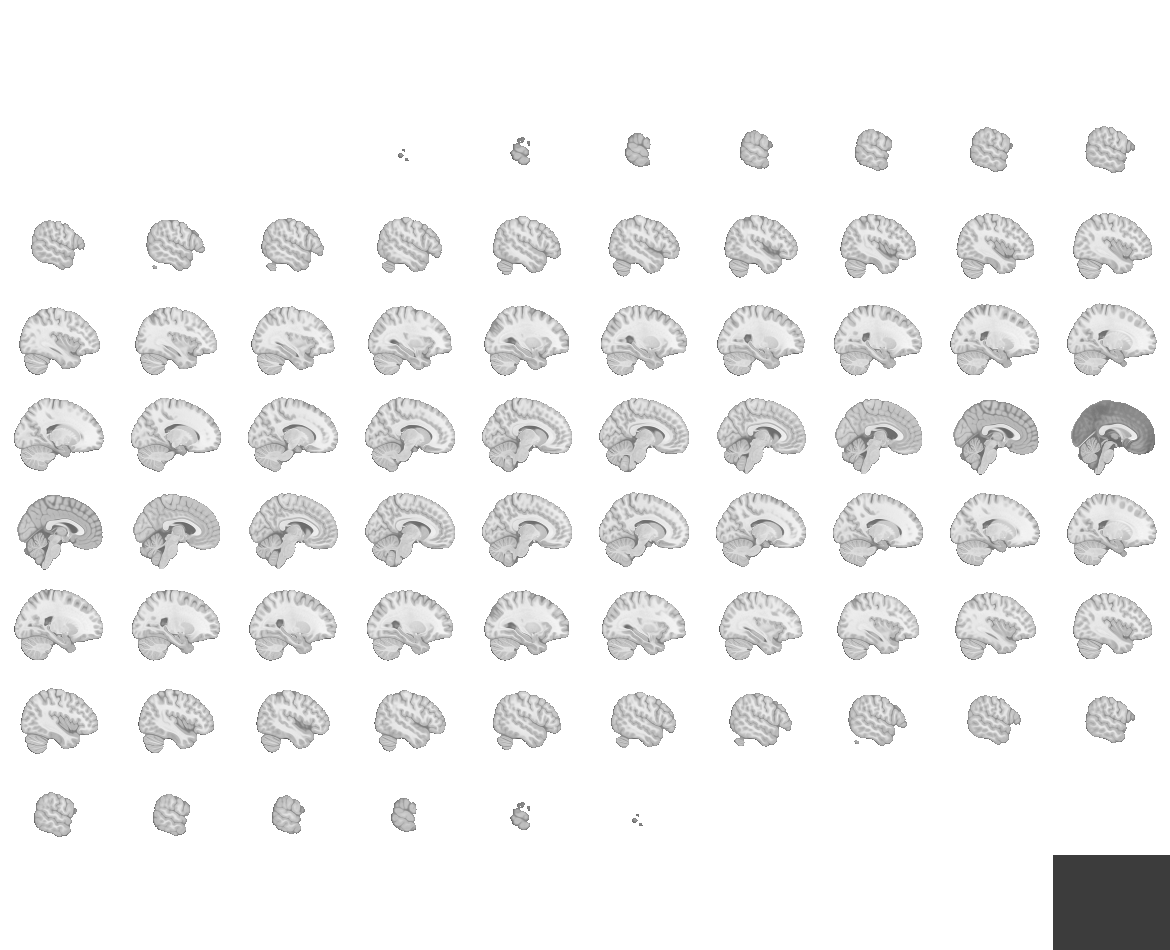
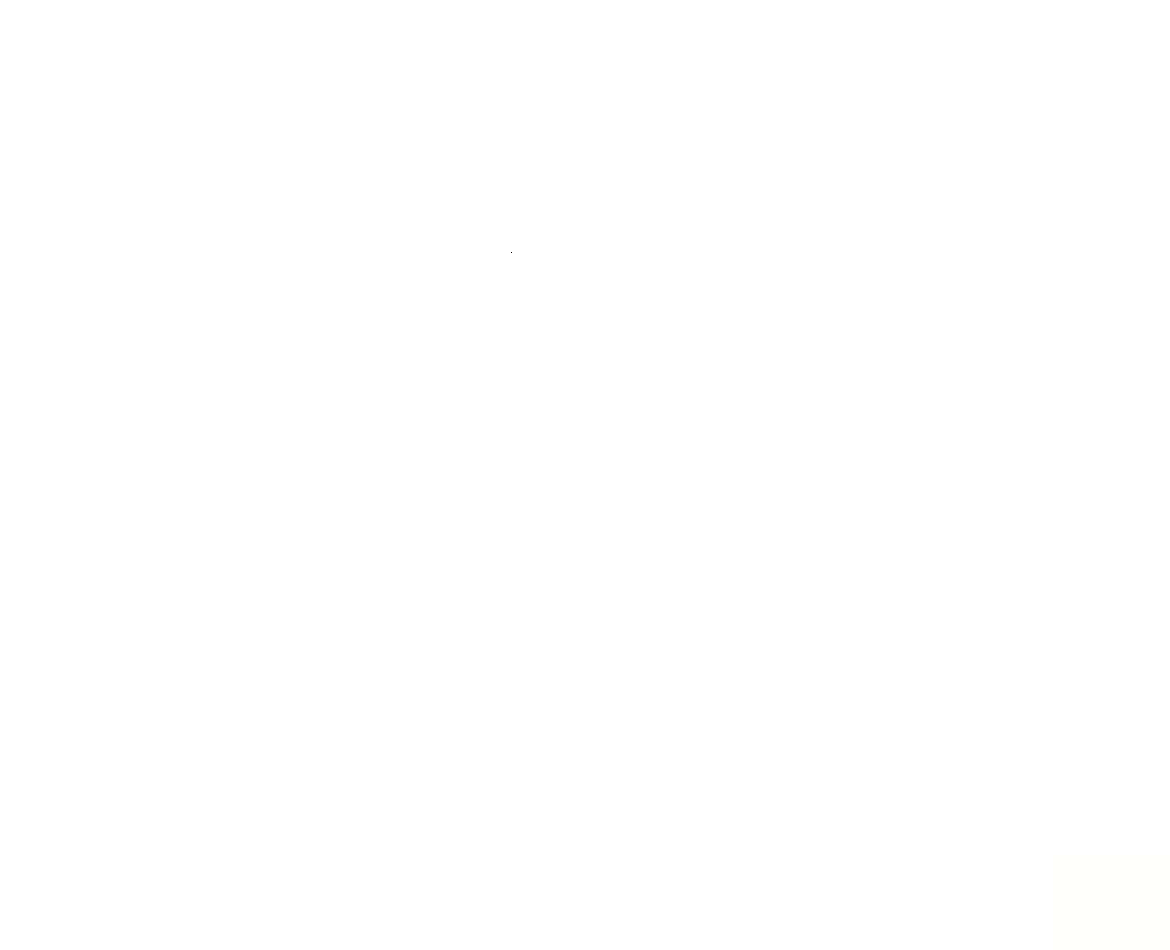

In [15]:
calvin_fwe.corrected_img

Visualize the P-Values (FWE Corrected) Used to Correct the Above


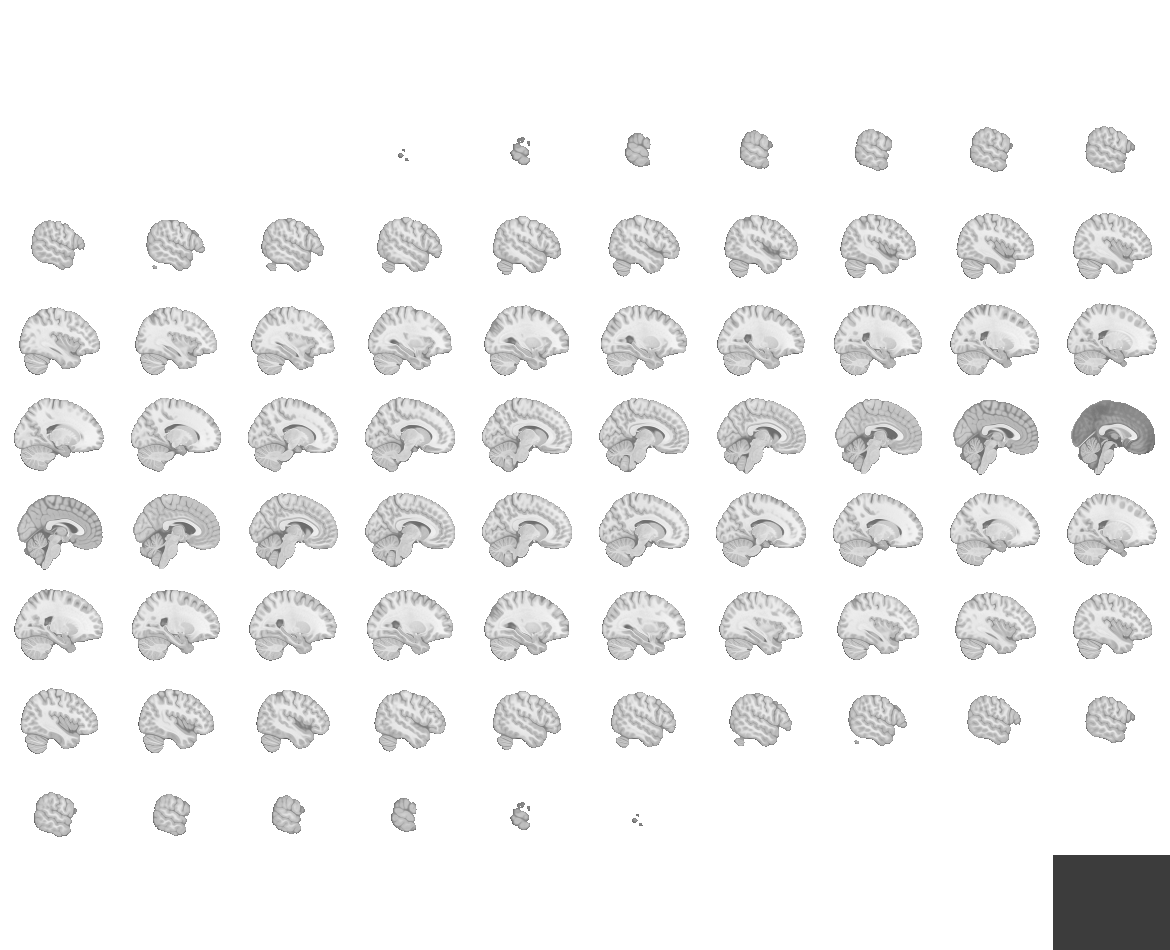
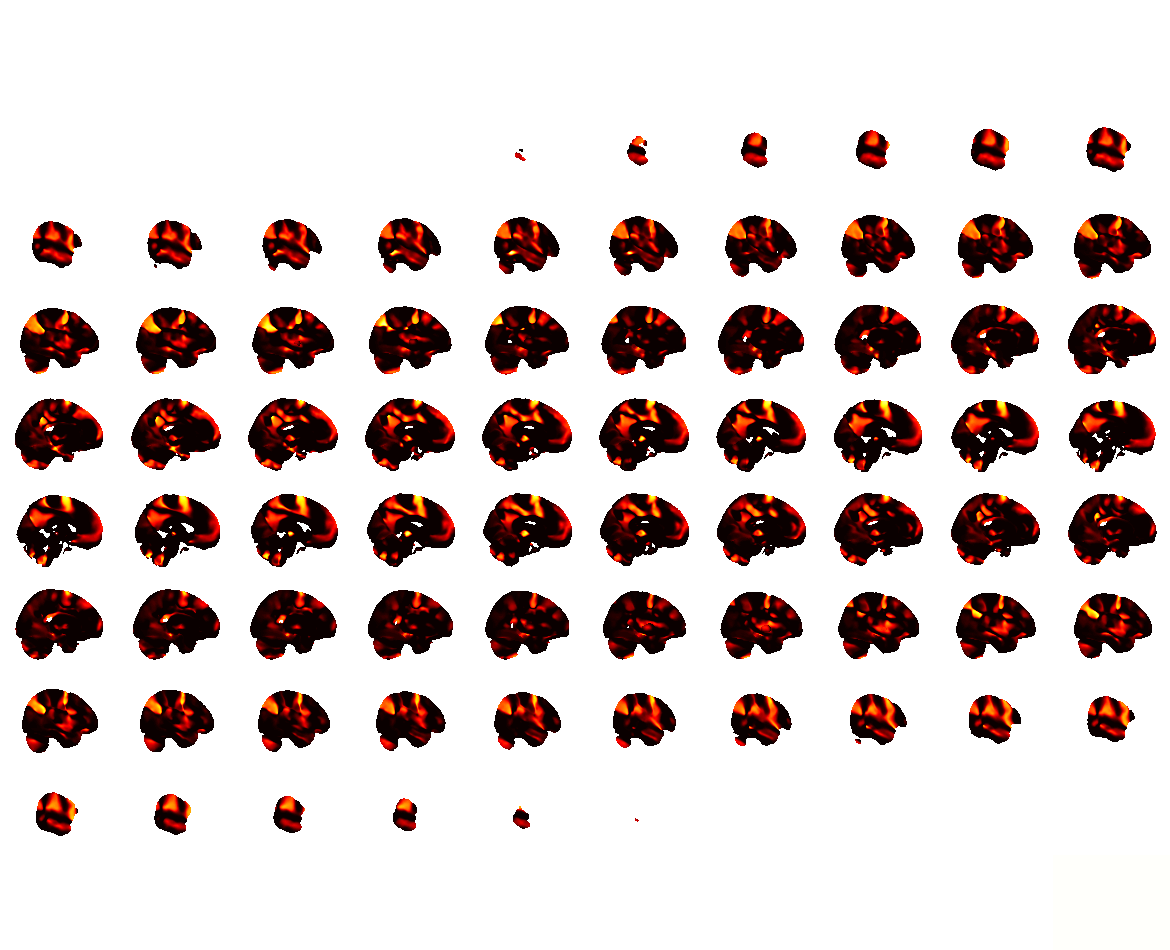

In [16]:
calvin_fwe.p_img

Visualize the Uncorrected Image


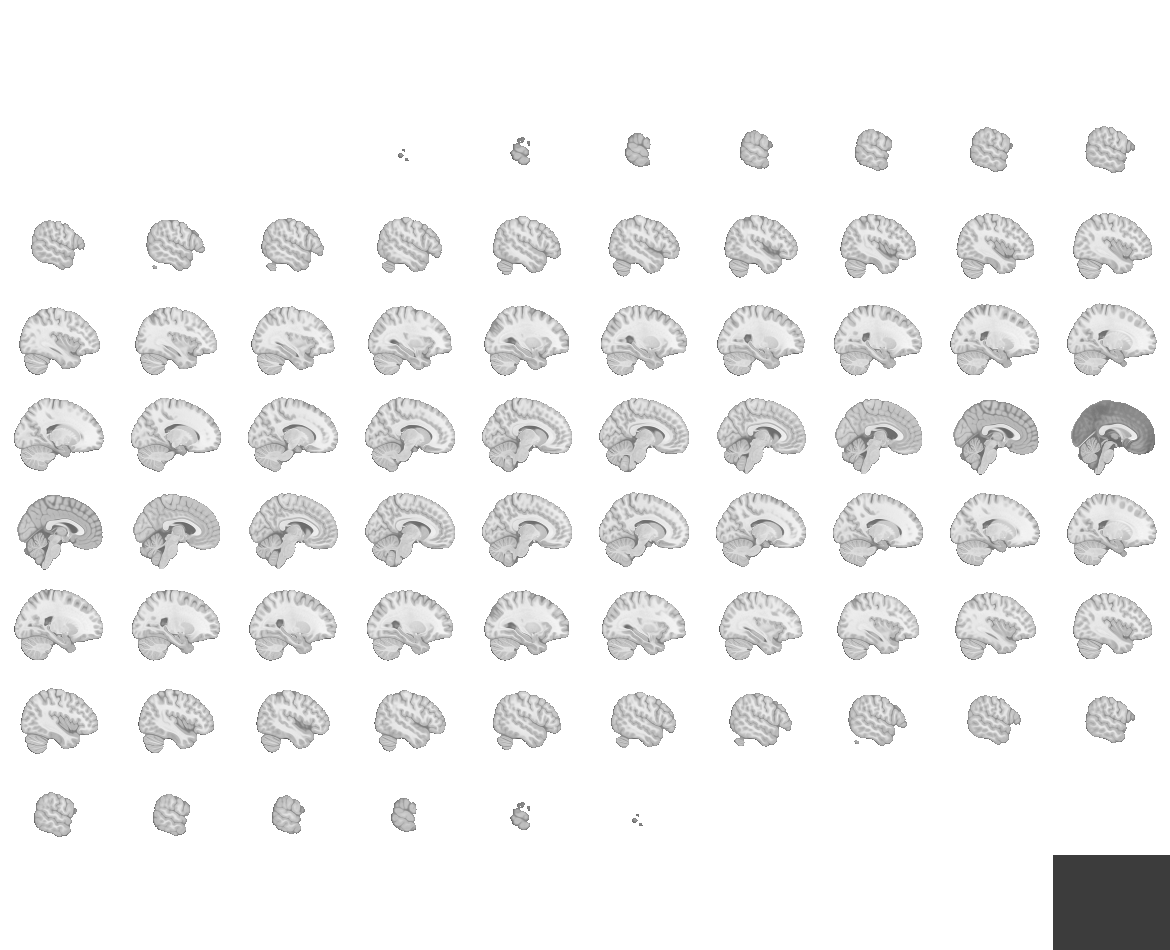
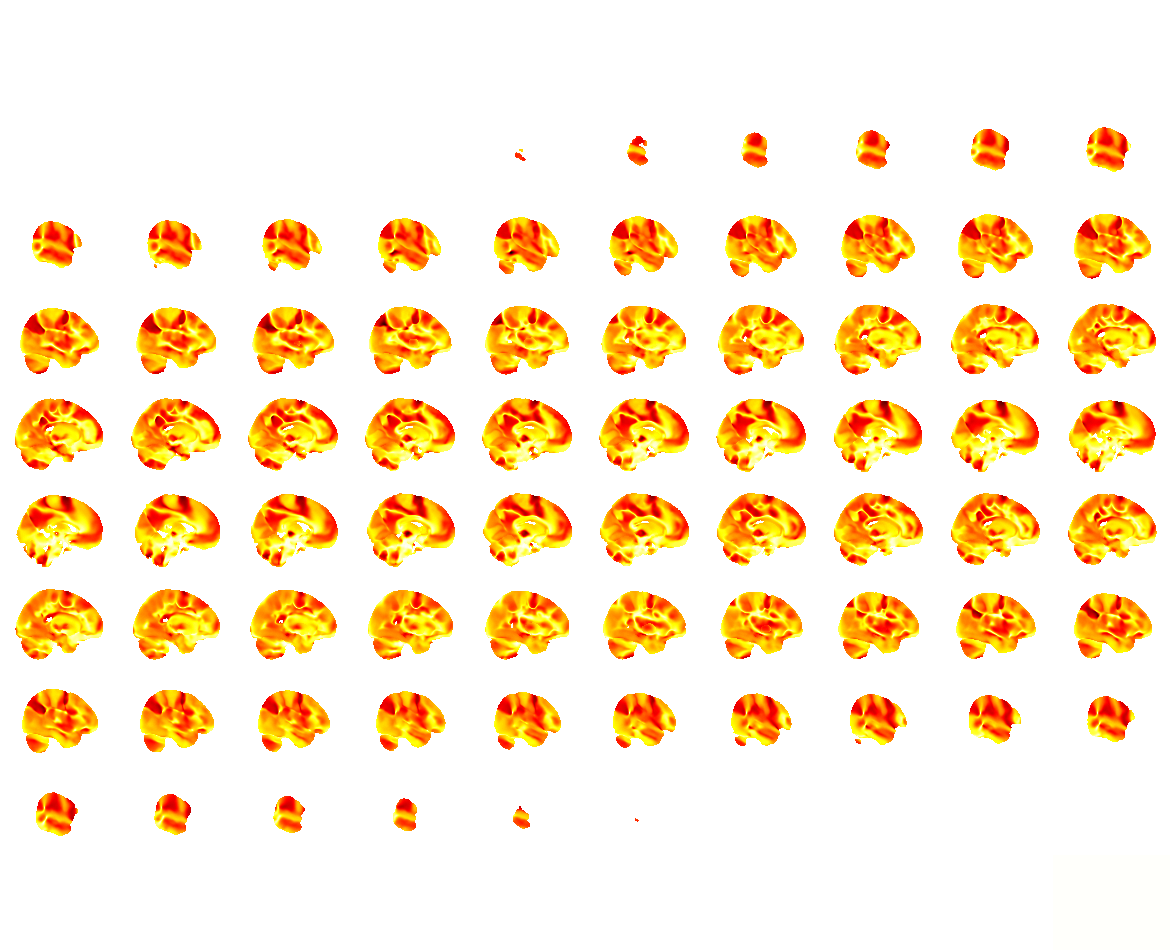

In [17]:
calvin_fwe.uncorrected_img

Visualize t values of last coefficient


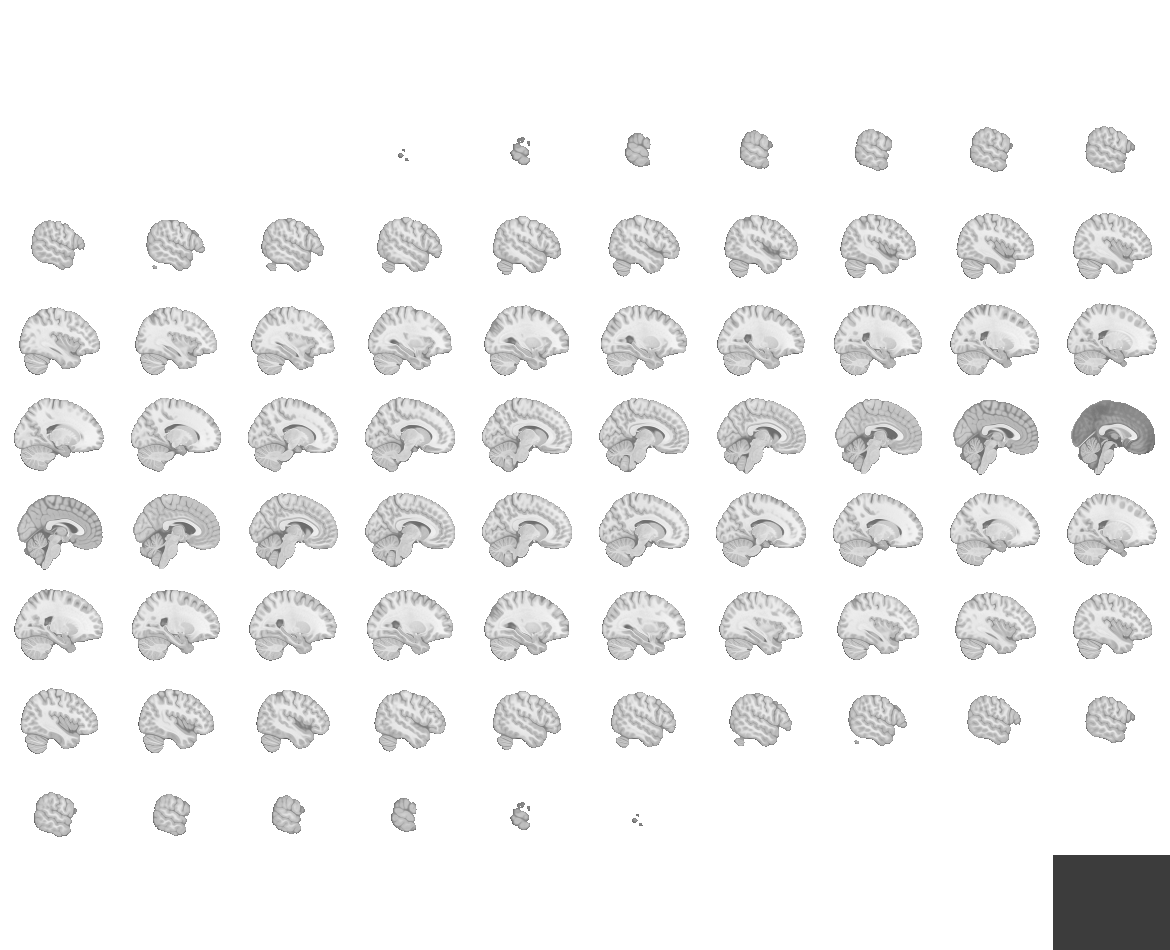
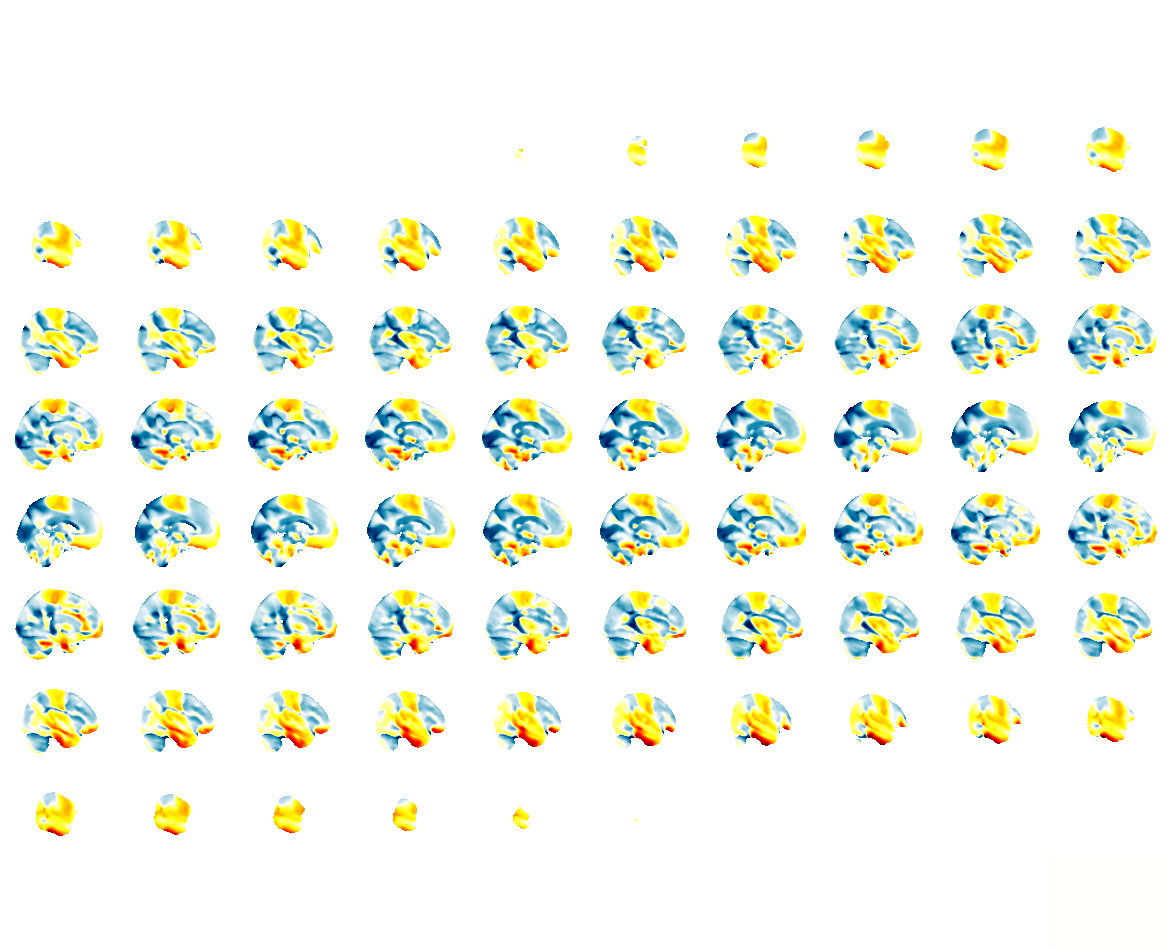

In [18]:
calvin_fwe.final_t_value